In [4]:
from data_utils import loadMNIST

from __future__ import print_function
from two_layer_net import *
from three_layer_net import *

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [8]:
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
print("Loaded training images of shape:", X_train.shape)
print("Loaded training labels of shape:", y_train.shape)
print("Loaded test images of shape", X_test.shape)
print("Loaded test labels of shape", y_test.shape)

Loaded training images of shape: (60000, 28, 28)
Loaded training labels of shape: (60000,)
Loaded test images of shape (10000, 28, 28)
Loaded test labels of shape (10000,)


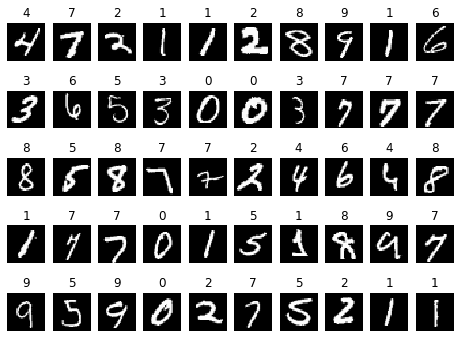

In [10]:
row, col = 5, 10
idx = np.random.choice(X_train.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title(y_train[plt_idx])
        plt.imshow(X_train[plt_idx,:,:])
        plt.axis('off')

plt.show()

In [15]:
# Split the data into train, val, and test sets. 
num_training = 50000
num_validation = 10000
num_test = 10000

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]


# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image.astype('float64')
X_val -= mean_image.astype('float64')
X_test -= mean_image.astype('float64')


print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

IndexError: index 50000 is out of bounds for axis 0 with size 50000